TOPIC--- 
Predicting Student PAss or Fail Using Study Hours

In [6]:
#loading and previewing the dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv(r"C:\Users\asus\Downloads\StudentMARKSHEET_UPDATED.csv")

print(df.head(10))
print(df.describe())


      name  hours_studied result  scores
0    Aarav          11.31   Pass   59.03
1   Vivaan          15.62   Pass   77.41
2   Aditya          16.93   Pass   87.89
3   Vihaan           3.19   Fail   23.57
4    Arjun           0.28   Fail    0.23
5      Sai           0.45   Fail    1.08
6  Reyansh           4.76   Fail   31.70
7    Ayaan          19.36   Pass  100.00
8  Krishna          10.25   Pass   48.90
9   Ishaan          17.15   Pass   88.46
       hours_studied      scores
count     300.000000  300.000000
mean        9.866500   49.349433
std         5.773549   28.983421
min         0.100000    0.000000
25%         5.045000   25.487500
50%         9.295000   46.060000
75%        15.052500   75.577500
max        19.990000  100.000000


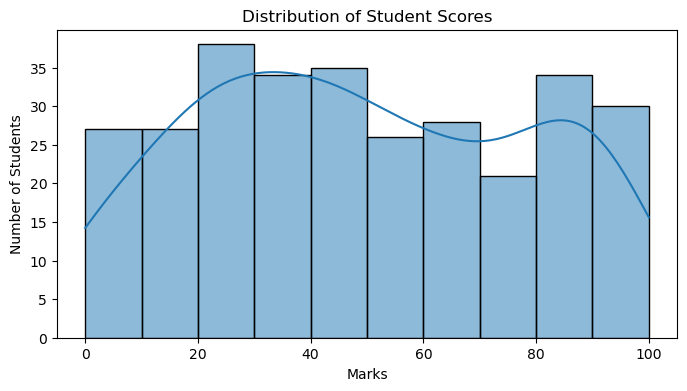

In [7]:
## 2. EDA - Exploratory Data Analysis
# Distribution of Scores
plt.figure(figsize=(8,4))
sns.histplot(df['scores'], bins=10, kde=True)
plt.title("Distribution of Student Scores")
plt.xlabel("Marks")
plt.ylabel("Number of Students")
plt.show()

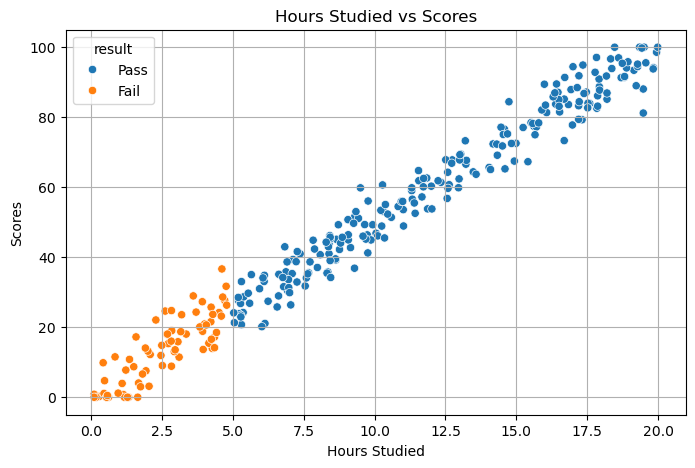

In [8]:
# Scatter Plot - Hours vs Scores
plt.figure(figsize=(8,5))
sns.scatterplot(x='hours_studied', y='scores', hue='result', data=df)
plt.title("Hours Studied vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.grid(True)
plt.show()

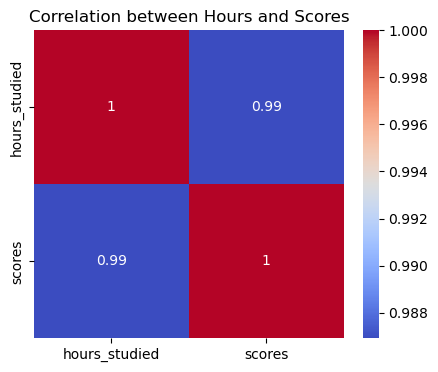

In [9]:
# Correlation Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(df[['hours_studied', 'scores']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Hours and Scores")
plt.show()

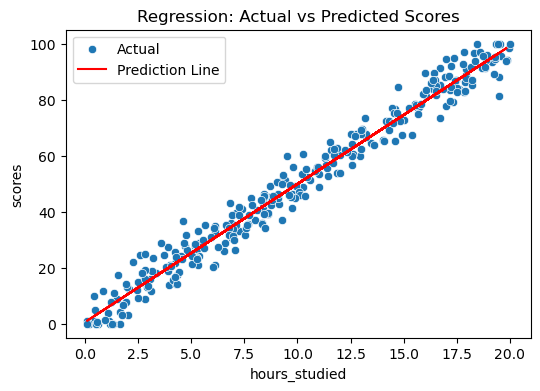

In [12]:
## 3. Regression Model to Predict Scores
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['hours_studied']]
y = df['scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)




# Visualize Predictions
plt.figure(figsize=(6,4))
sns.scatterplot(x='hours_studied', y='scores', data=df, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Prediction Line')
plt.title("Regression: Actual vs Predicted Scores")
plt.legend()
plt.show()

In [13]:
# Evaluation
print("Regression Model Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Regression Model Evaluation:
Mean Squared Error: 22.051806567830916
R² Score: 0.9752644321871068


In [18]:
## 4. Classification Model to Predict Pass/Fail
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Encode result column
le = LabelEncoder()
df['result_encoded'] = le.fit_transform(df['result'])

X_class = df[['hours_studied']]
y_class = df['result_encoded']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=0)

clf = LogisticRegression()
clf.fit(X_train_c, y_train_c)
y_pred_c = clf.predict(X_test_c)


# Evaluation
print("\nClassification Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test_c, y_pred_c))
print(classification_report(y_test_c, y_pred_c, target_names=le.classes_))


Classification Model Evaluation:
Accuracy Score: 1.0
              precision    recall  f1-score   support

        Fail       1.00      1.00      1.00        12
        Pass       1.00      1.00      1.00        48

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

